# Random Forest Classifier - Label 3

Classify plankton species (with detritus removed) using random forests.

In [ ]:
# delete variables in memory
%reset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Load he data which have been preprocessed in R.

In [2]:
train = pd.read_csv("../../../data/processed/labelled-features/labelled-features-train.csv")
train = train.set_index('index')

test = pd.read_csv("../../../data/processed/labelled-features/labelled-features-test.csv")
test = test.set_index('index')

In [3]:
print(train["label3"].unique())

['annelida_polychaeta' 'appendicularia' 'bivalvia-larvae' 'byrozoa-larvae'
 'chaetognatha' 'cirripedia_barnacle-nauplii' 'cladocera'
 'cladocera_evadne-spp' 'cnidaria' 'copepod_unknown' 'copepod_calanoida'
 'copepod_calanoida_acartia-spp' 'copepod_calanoida_calanus-spp'
 'copepod_calanoida_candacia-spp' 'copepod_calanoida_centropages-spp'
 'copepod_calanoida_para-pseudocalanus-spp' 'copepod_calanoida_temora-spp'
 'copepod_cyclopoida' 'copepod_cyclopoida_corycaeus-spp'
 'copepod_cyclopoida_oithona-spp' 'copepod_cyclopoida_oncaea-spp'
 'copepod_harpacticoida' 'copepod_nauplii' 'decapoda-larvae_brachyura'
 'echniodermata-larvae' 'euphausiid' 'euphausiid_nauplii' 'fish-eggs'
 'gastropoda-larva' 'mysideacea' 'nt-bubbles' 'nt-phyto_ceratium-spp'
 'nt-phyto_rhizosolenia-spp' 'nt_phyto_chains' 'ostracoda' 'radiolaria'
 'tintinnida' 'tunicata_doliolida' 'detritus']


In [4]:
print( len( train["label3"].unique() ) )

39


In [5]:
for col in train.columns:
    print(col)

filename
label1
label2
label3
object_label
object_width
object_height
object_bx
object_by
object_circ.
object_area_exc
object_area
object_%area
object_major
object_minor
object_y
object_x
object_convex_area
object_min
object_max
object_mean
object_intden
object_perim.
object_elongation
object_range
object_perimareaexc
object_perimmajor
object_circex
object_angle
object_bounding_box_area
object_eccentricity
object_equivalent_diameter
object_euler_number
object_extent
object_local_centroid_col
object_local_centroid_row
object_solidity
img_file_name
img_rank


These are the columns we are retaining in the features matrix (X)

In [6]:
cols_retain = [ col for col in train.columns if col not in ['filename', 'label1', 'label2', 'label3',
                                                           'img_file_name', 'img_rank'] ]

In [7]:
for col in cols_retain:
    print(col)

object_label
object_width
object_height
object_bx
object_by
object_circ.
object_area_exc
object_area
object_%area
object_major
object_minor
object_y
object_x
object_convex_area
object_min
object_max
object_mean
object_intden
object_perim.
object_elongation
object_range
object_perimareaexc
object_perimmajor
object_circex
object_angle
object_bounding_box_area
object_eccentricity
object_equivalent_diameter
object_euler_number
object_extent
object_local_centroid_col
object_local_centroid_row
object_solidity


Remove detritus

In [8]:
train = train[~train.label2.str.contains("detritus")]
test = test[~test.label2.str.contains("detritus")]

In [9]:
sum(train.label2 == "detritus")

0

In [10]:
sum(test.label2 == "detritus")

0

Encode target labels with value between 0 and n_classes-1.

In [11]:
# Encode taget labels with value between 0 and n_classes-1
LE = LabelEncoder()
LE.fit( train['label3'] ) # fit label encoder
y_train = LE.transform( train['label3'] ) # transform labels to normalized encoding
y_test = LE.transform( test['label3'] ) # transform labels to normalized encoding

In [12]:
LE.classes_

array(['annelida_polychaeta', 'appendicularia', 'bivalvia-larvae',
       'byrozoa-larvae', 'chaetognatha', 'cirripedia_barnacle-nauplii',
       'cladocera', 'cladocera_evadne-spp', 'cnidaria',
       'copepod_calanoida', 'copepod_calanoida_acartia-spp',
       'copepod_calanoida_calanus-spp', 'copepod_calanoida_candacia-spp',
       'copepod_calanoida_centropages-spp',
       'copepod_calanoida_para-pseudocalanus-spp',
       'copepod_calanoida_temora-spp', 'copepod_cyclopoida',
       'copepod_cyclopoida_corycaeus-spp',
       'copepod_cyclopoida_oithona-spp', 'copepod_cyclopoida_oncaea-spp',
       'copepod_harpacticoida', 'copepod_nauplii', 'copepod_unknown',
       'decapoda-larvae_brachyura', 'echniodermata-larvae', 'euphausiid',
       'euphausiid_nauplii', 'fish-eggs', 'gastropoda-larva',
       'mysideacea', 'nt-bubbles', 'nt-phyto_ceratium-spp',
       'nt-phyto_rhizosolenia-spp', 'nt_phyto_chains', 'ostracoda',
       'radiolaria', 'tintinnida', 'tunicata_doliolida'], dtype

In [13]:
X_train = train[cols_retain]  # Features
X_test = test[cols_retain]  # Features

Apply random forest classifier using default settings and make prediction

In [14]:
# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) # this is the default number of trees in the forest

In [15]:
import time

tic = time.perf_counter()
clf.fit(X_train,y_train) # Train the model using the training sets
toc = time.perf_counter()

print("Time to train model: %.4f seconds" % (toc-tic))

Time to train model: 5.6571 seconds


In [16]:
#Make prediction using features in test set
y_pred=clf.predict(X_test)
y_pred

array([14, 14, 22, ...,  9, 37, 37])

Calculate metrics on the random forest model

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error: 6.086206896551724
Mean Squared Error: 83.15517241379311
Root Mean Squared Error: 9.118945795090193
Accuracy: 0.30023781212841855


In [18]:
print(metrics.classification_report(y_test,y_pred, target_names=LE.classes_))

                                          precision    recall  f1-score   support

                     annelida_polychaeta       0.00      0.00      0.00        14
                          appendicularia       0.33      0.14      0.20         7
                         bivalvia-larvae       0.40      0.50      0.44         4
                          byrozoa-larvae       0.00      0.00      0.00         9
                            chaetognatha       0.30      0.20      0.24        15
             cirripedia_barnacle-nauplii       0.00      0.00      0.00         7
                               cladocera       0.00      0.00      0.00         3
                    cladocera_evadne-spp       0.00      0.00      0.00         3
                                cnidaria       0.20      0.17      0.18         6
                       copepod_calanoida       0.19      0.20      0.19       165
           copepod_calanoida_acartia-spp       0.09      0.07      0.08        45
           cope

/opt/pyenv/versions/3.8.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/pyenv/versions/3.8.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/pyenv/versions/3.8.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

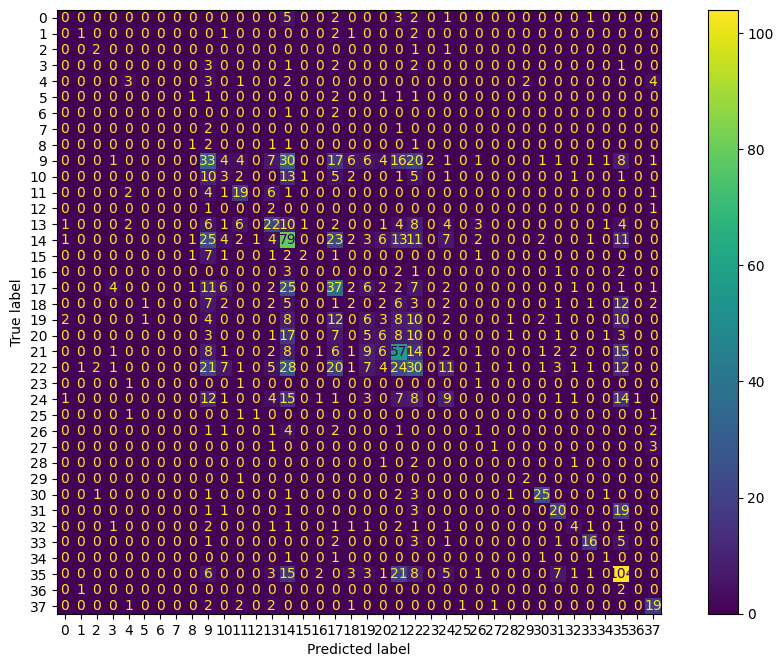

In [20]:
metrics.plot_confusion_matrix(clf, X_test, y_test) 
plt.show()

Find important features for classification

In [21]:
feature_names = X_train.columns
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(feature_imp)

object_mean                   0.137889
object_range                  0.123942
object_min                    0.118622
object_max                    0.113882
object_intden                 0.101868
object_convex_area            0.024546
object_perimareaexc           0.024248
object_area_exc               0.024234
object_equivalent_diameter    0.023737
object_area                   0.023642
object_bounding_box_area      0.023602
object_circex                 0.022751
object_circ.                  0.022645
object_perim.                 0.021908
object_elongation             0.021900
object_eccentricity           0.021687
object_perimmajor             0.021398
object_local_centroid_row     0.020249
object_height                 0.020184
object_y                      0.019611
object_major                  0.017132
object_minor                  0.014014
object_width                  0.011002
object_local_centroid_col     0.010628
object_x                      0.010402
object_angle             

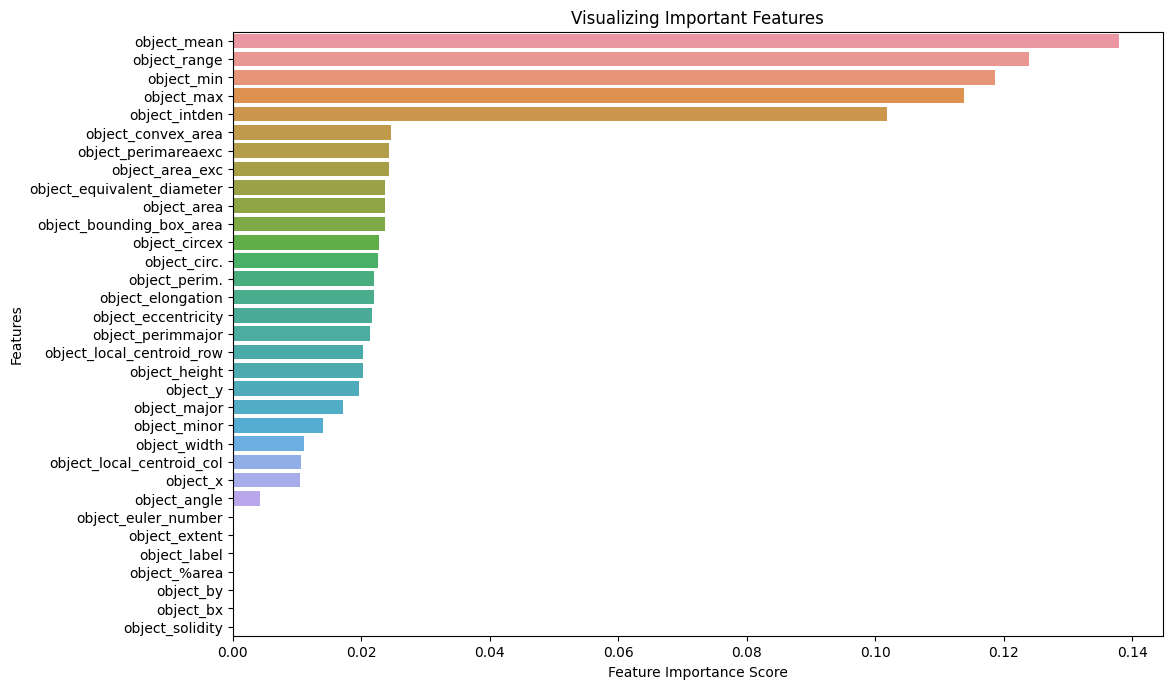

In [22]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

The following calculates precision, recall, accuracy and f1 using the pre-computed confusion matrix

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [24]:
from evaluate_model import model_metrics
accuracy, precision, recall, f1 = model_metrics(confusion_matrix)
print("precision = %.3f" % precision)
print("recall = %.3f" % recall)
print("accuracy = %.3f" % accuracy)
print("f1 = %.3f" % f1)

precision = nan
recall = 0.217
accuracy = 0.300
f1 = nan


/home/david.salvador/Documents/plankton-dsg-challenge/notebooks/python/dsg2021/evaluate_model.py:19: RuntimeWarning: invalid value encountered in true_divide
  precision = (true_pos / (true_pos + false_pos))
/home/david.salvador/Documents/plankton-dsg-challenge/notebooks/python/dsg2021/evaluate_model.py:21: RuntimeWarning: invalid value encountered in true_divide
  f1 = 2*precision*recall / (precision + recall)


Export pre-trained model as pkl file so that it can later be used in scivision

In [ ]:
with open('/output/models/randomforest/rf-label3.pkl','wb') as f:
    pickle.dump(clf,f)